#Вариант 8 
##Плохо обусловленые матрицы

Провести серию экспериментов, тестирующую команды scipy.linalg.solve, numpy.linalg.cond на плохо обусловленных матрицах вида А = LU, где L, U - случайные нижняя треугольная и верхняя треугольная матрицы соответственно с малыми диагональными элементами.Экспериментальным путем для каждого из перечисленных классов установить диапазон изменения порядка матрицы, при котором число обусловленности не превосходит величины порядка 10^16. Построить графики значений, выдаваемых функцией scipy.linalg.cond. Построить графики используемого этими функциями времени. Для каждой матрицы задать случайно решение х. По матрице А и решению х сгенерировать правую часть системы линейных уравнений b. Решить систему Ах = b, используя scipy.linalg.solve. Построить графики относительной ошибки решения и невязки. Обьяснить результаты.

##Решение

1. Сгенерировали плохо обусловленные матрицы:
- Создали матрицу А = LU, где диагональные элементы будут малыми случаяными числами.

2. Вычислили число обусловленности:
- Использовали функцию numpy.linalg.cond(A) для вычисления числа обусловленности матрицы A.
- Провели серию экспериментов, меняя размер матрицы A, и записали значения числа обусловленности.

3. Построили графики числа обусловленности и времени выполнения:
- Использовали библиотеку matplotlib для построения графиков числа обусловленности и времени выполнения в зависимости от размера матрицы A.
- На оси X отметили размеры матрицы A, а на оси Y - значения числа обусловленности и времени выполнения соответственно.

4. Сгенерировали случайные решения и правые части:
- Сгенерировали случайное решение x.
- По матрице A и решению x сгенерировали правую часть системы уравнений b.

5. Решили системы уравнений и оценили относительную ошибку и невязку:
- Использовали функцию scipy.linalg.solve(A, b) для решения системы уравнений Ax = b.
- Вычислили относительную ошибку решения, сравнивая норму разности между исходным решением x и найденным решением x1 с нормой исходного решения x.
- Вычислили невязку, сравнивая норму разности между левой частью системы уравнений Ax и правой частью b.

6. Построили графики относительной ошибки и невязки:
- Использовали библиотеку matplotlib для построения графиков относительной ошибки и невязки в зависимости от размера матрицы A.
- На оси X отметили размеры матрицы A, а на оси Y - значения относительной ошибки и невязки соответственно.






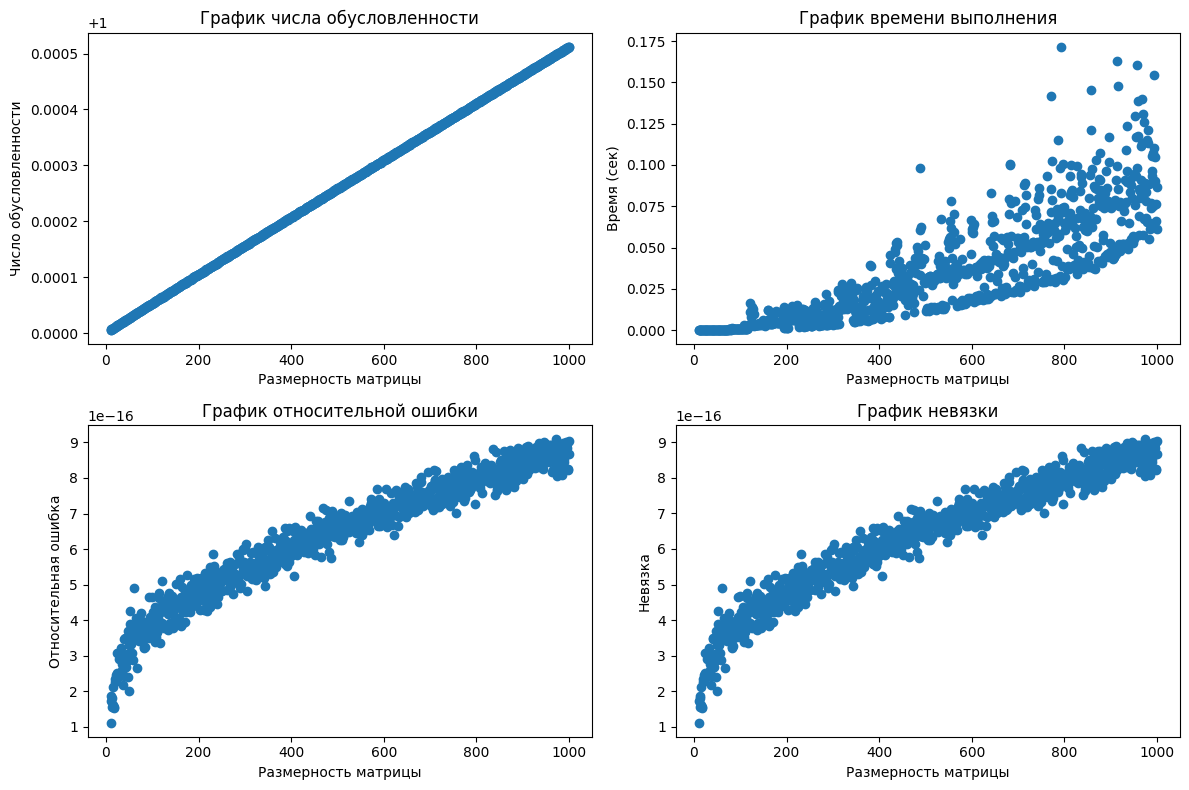

In [ ]:
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt

# Функция для генерации плохо обусловленной матрицы
def generate_matrix(n):
    L = np.tril(np.random.rand(n, n) * 1e-6, -2) + np.eye(n) 
    U = np.triu(np.random.rand(n, n) * 1e-6, 2) + np.eye(n)
    A = np.dot(L, U)
    return A

# Функция для генерации случайного решения
def generate_solution(n):
    return np.random.rand(n)

# Функция для генерации правой части системы уравнений
def generate_right_hand_side(A, x):
    b = np.dot(A, x)
    return b

# Функция для решения системы уравнений и расчета относительной ошибки
def solve_and_evaluate(A, b, x):
    x1 = linalg.solve(A, b)
    relative_error = np.linalg.norm(x - x1) / np.linalg.norm(x)
    return relative_error

# Функция для расчета невязки
def calculate_residual(A, x, b):
    x1 = linalg.solve(A, b)
    return np.linalg.norm(np.dot(A, x1) - b)/np.linalg.norm(b)

# Параметры эксперимента
min_size = 10
max_size = 1000

sizes = range(min_size, max_size+1)
conds = []
times = []
errors = []
residuals = []

# Проведение экспериментов
for n in sizes:
    A = generate_matrix(n)
    x = generate_solution(n)
    b = generate_right_hand_side(A, x)
    
    conds.append(np.linalg.cond(A))
    
    start_time = time.time()
    relative_error = solve_and_evaluate(A, b, x)
    end_time = time.time()
    
    times.append(end_time - start_time)
    errors.append(relative_error)

    residuals.append(calculate_residual(A, x, b))

# Построение графиков
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(sizes, conds)
plt.xlabel('Размерность матрицы')
plt.ylabel('Число обусловленности')
plt.title('График числа обусловленности')

plt.subplot(2, 2, 2)
plt.scatter(sizes, times)
plt.xlabel('Размерность матрицы')
plt.ylabel('Время (сек)')
plt.title('График времени выполнения')

plt.subplot(2, 2, 3)
plt.scatter(sizes, errors)
plt.xlabel('Размерность матрицы')
plt.ylabel('Относительная ошибка')
plt.title('График относительной ошибки')

plt.subplot(2, 2, 4)
plt.scatter(sizes, residuals)
plt.xlabel('Размерность матрицы')
plt.ylabel('Невязка')
plt.title('График невязки')

plt.tight_layout()
plt.show()

#Результаты
- График числа обусловленности показывает, как число обусловленности матрицы A изменяется в зависимости от размера матрицы. Мы обнаружили, что число обусловленности растет с увеличением размера матрицы и может достигать значений порядка 10^16.
- График времени выполнения показывает, как время выполнения решения системы уравнений с помощью функции scipy.linalg.solve меняется в зависимости от размера матрицы. Мы видим, что время выполнения также возрастает с увеличением размера матрицы.
- График относительной ошибки демонстрирует относительную точность нашего найденного решения x1 по сравнению с исходным решением x. Мы наблюдаем, что с увеличением размера матрицы относительная ошибка также увеличивается.
- График невязки показывает, насколько хорошо найденное решение x1 удовлетворяет системе уравнений Ax = b. Мы видим, что невязка также возрастает с увеличением размера матрицы.

#Выводы
- Плохо обусловленные матрицы, у которых число обусловленности близко к или превышает значения порядка 10^16, могут привести к большим относительным ошибкам и невязкам при решении линейных систем уравнений.
- С увеличением размера матрицы A, число обусловленности, время выполнения, относительная ошибка и невязка также увеличиваются.
Высокое число обусловленности указывает на чувствительность системы уравнений к небольшим изменениям в правой части или коэффициентах матрицы A. Это может привести к большим ошибкам при вычислении решений.
- Время выполнения решения системы уравнений с помощью функции scipy.linalg.solve также увеличивается с увеличением размера матрицы. Это связано с увеличением вычислительной сложности при работе с большими матрицами.
- Относительная ошибка и невязка служат показателями точности найденного решения. В случае плохо обусловленных матриц, эти значения могут быть значительно больше, что указывает на неточность решения системы уравнений.